In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # for scaling
from sklearn.cluster import KMeans # for clustering

In [21]:
# load the dataset
segment_df = pd.read_csv('travelTide_customer_segmented_dataset-kmeans.csv')
segment_df

,user_id,total_hotel_spent,checked_bags,no_cancelled_trip,discounted_trip,trip_with_return_flight
0,534594,28114.0,0.0,2,0.0,1.0
1,596863,27489.0,4.0,3,0.0,1.0
2,507805,27241.0,6.0,5,1.0,5.0
3,539710,22619.0,1.0,4,1.0,3.0
4,669329,22356.0,0.0,2,0.0,1.0
...,...,...,...,...,...,...
5993,544926,-349.0,0.0,3,2.0,3.0
5994,577534,-398.0,1.0,1,1.0,1.0
5995,596320,-477.0,2.0,2,1.0,1.0
5996,539868,-562.0,1.0,3,1.0,2.0


In [22]:
# sort the dataset according to user_id
segment_df = segment_df.sort_values('user_id', ascending = True)

In [23]:
segment_df

,user_id,total_hotel_spent,checked_bags,no_cancelled_trip,discounted_trip,trip_with_return_flight
863,23557,3802.0,0.0,2,1.0,0.0
5178,94883,130.0,1.0,2,0.0,2.0
1856,101486,2199.0,0.0,2,0.0,1.0
1634,101961,2429.0,2.0,5,1.0,5.0
117,106907,8514.0,10.0,1,0.0,1.0
...,...,...,...,...,...,...
5151,792549,144.0,2.0,4,0.0,1.0
2984,796032,1261.0,5.0,3,1.0,2.0
3704,801660,872.0,1.0,3,1.0,3.0
3742,811077,852.0,0.0,1,0.0,1.0


In [24]:
# Select relevant metrics for clustering
metrics = ['total_hotel_spent', 'checked_bags', 'no_cancelled_trip', 'discounted_trip', 'trip_with_return_flight']
X = segment_df[metrics]

In [25]:
X

,total_hotel_spent,checked_bags,no_cancelled_trip,discounted_trip,trip_with_return_flight
863,3802.0,0.0,2,1.0,0.0
5178,130.0,1.0,2,0.0,2.0
1856,2199.0,0.0,2,0.0,1.0
1634,2429.0,2.0,5,1.0,5.0
117,8514.0,10.0,1,0.0,1.0
...,...,...,...,...,...
5151,144.0,2.0,4,0.0,1.0
2984,1261.0,5.0,3,1.0,2.0
3704,872.0,1.0,3,1.0,3.0
3742,852.0,0.0,1,0.0,1.0


In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled

array([[ 0.79305145, -0.97483371, -0.44893115,  0.36429641, -1.34872558],
       [-0.77913349, -0.28377443, -0.44893115, -0.87229095,  0.07626227],
       [ 0.10671908, -0.97483371, -0.44893115, -0.87229095, -0.63623165],
       ...,
       [-0.46144252, -0.28377443,  0.20846364,  0.36429641,  0.78875619],
       [-0.47000562, -0.97483371, -1.10632594, -0.87229095, -0.63623165],
       [-0.83479363, -0.97483371, -1.76372072, -0.87229095, -1.34872558]])

In [28]:
# Apply K-means clustering
num_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
segment_df['cluster'] = kmeans.fit_predict(X_scaled)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
# Assign perks based on cluster
def assign_perk(cluster_id):
    if cluster_id == 0:
        return 'Free Hotel Meal'
    elif cluster_id == 1:
        return 'Free Checked Bag'
    elif cluster_id == 2:
        return 'No Cancellation Fees'
    elif cluster_id == 3:
        return 'Exclusive discounts'
    elif cluster_id == 4:
        return '1 night free with flight'

segment_df['perk'] = segment_df['cluster'].apply(assign_perk)

In [39]:
# see the assigned cluster
segment_df[['user_id', 'cluster', 'perk']]

,user_id,cluster,perk
863,23557,3,Exclusive discounts
5178,94883,1,Free Checked Bag
1856,101486,3,Exclusive discounts
1634,101961,0,Free Hotel Meal
117,106907,2,No Cancellation Fees
...,...,...,...
5151,792549,1,Free Checked Bag
2984,796032,0,Free Hotel Meal
3704,801660,1,Free Checked Bag
3742,811077,3,Exclusive discounts


In [40]:
segment_df

,user_id,total_hotel_spent,checked_bags,no_cancelled_trip,discounted_trip,trip_with_return_flight,cluster,perk
863,23557,3802.0,0.0,2,1.0,0.0,3,Exclusive discounts
5178,94883,130.0,1.0,2,0.0,2.0,1,Free Checked Bag
1856,101486,2199.0,0.0,2,0.0,1.0,3,Exclusive discounts
1634,101961,2429.0,2.0,5,1.0,5.0,0,Free Hotel Meal
117,106907,8514.0,10.0,1,0.0,1.0,2,No Cancellation Fees
...,...,...,...,...,...,...,...,...
5151,792549,144.0,2.0,4,0.0,1.0,1,Free Checked Bag
2984,796032,1261.0,5.0,3,1.0,2.0,0,Free Hotel Meal
3704,801660,872.0,1.0,3,1.0,3.0,1,Free Checked Bag
3742,811077,852.0,0.0,1,0.0,1.0,3,Exclusive discounts


In [42]:
# save the segmented dataset
segment_df[['user_id', 'perk']].to_csv('travelTide_customer_segmented_dataset-kmeans-applied.csv', index=False)

In [35]:
import matplotlib.pyplot as plt # for plotting

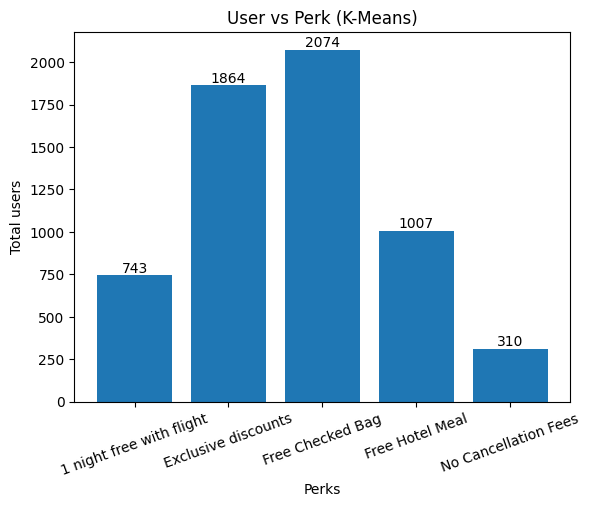

In [41]:
# Group by 'perk' column and count rows in each group
grouped = segment_df.groupby('perk').size().reset_index(name='Count')

# Create a bar plot
plt.bar(grouped['perk'], grouped['Count'])
plt.xlabel('Perks')
plt.ylabel('Total users')
plt.title('User vs Perk (K-Means)')
plt.xticks(rotation=20)

# Add value labels on top of bars
for i, value in enumerate(grouped['Count']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

    
plt.show()

In [43]:
grouped

,perk,Count
0,1 night free with flight,743
1,Exclusive discounts,1864
2,Free Checked Bag,2074
3,Free Hotel Meal,1007
4,No Cancellation Fees,310
